In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [3]:
warnings.filterwarnings("ignore")

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [9]:
df=pd.read_csv("Traffic.csv")
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [11]:
df.shape


(2976, 9)

In [13]:
df['Date'].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9],
      dtype=int64)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [17]:
df['Day of the week'].value_counts()

Day of the week
Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: count, dtype: int64

In [19]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [21]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [23]:
df.duplicated().sum()


0

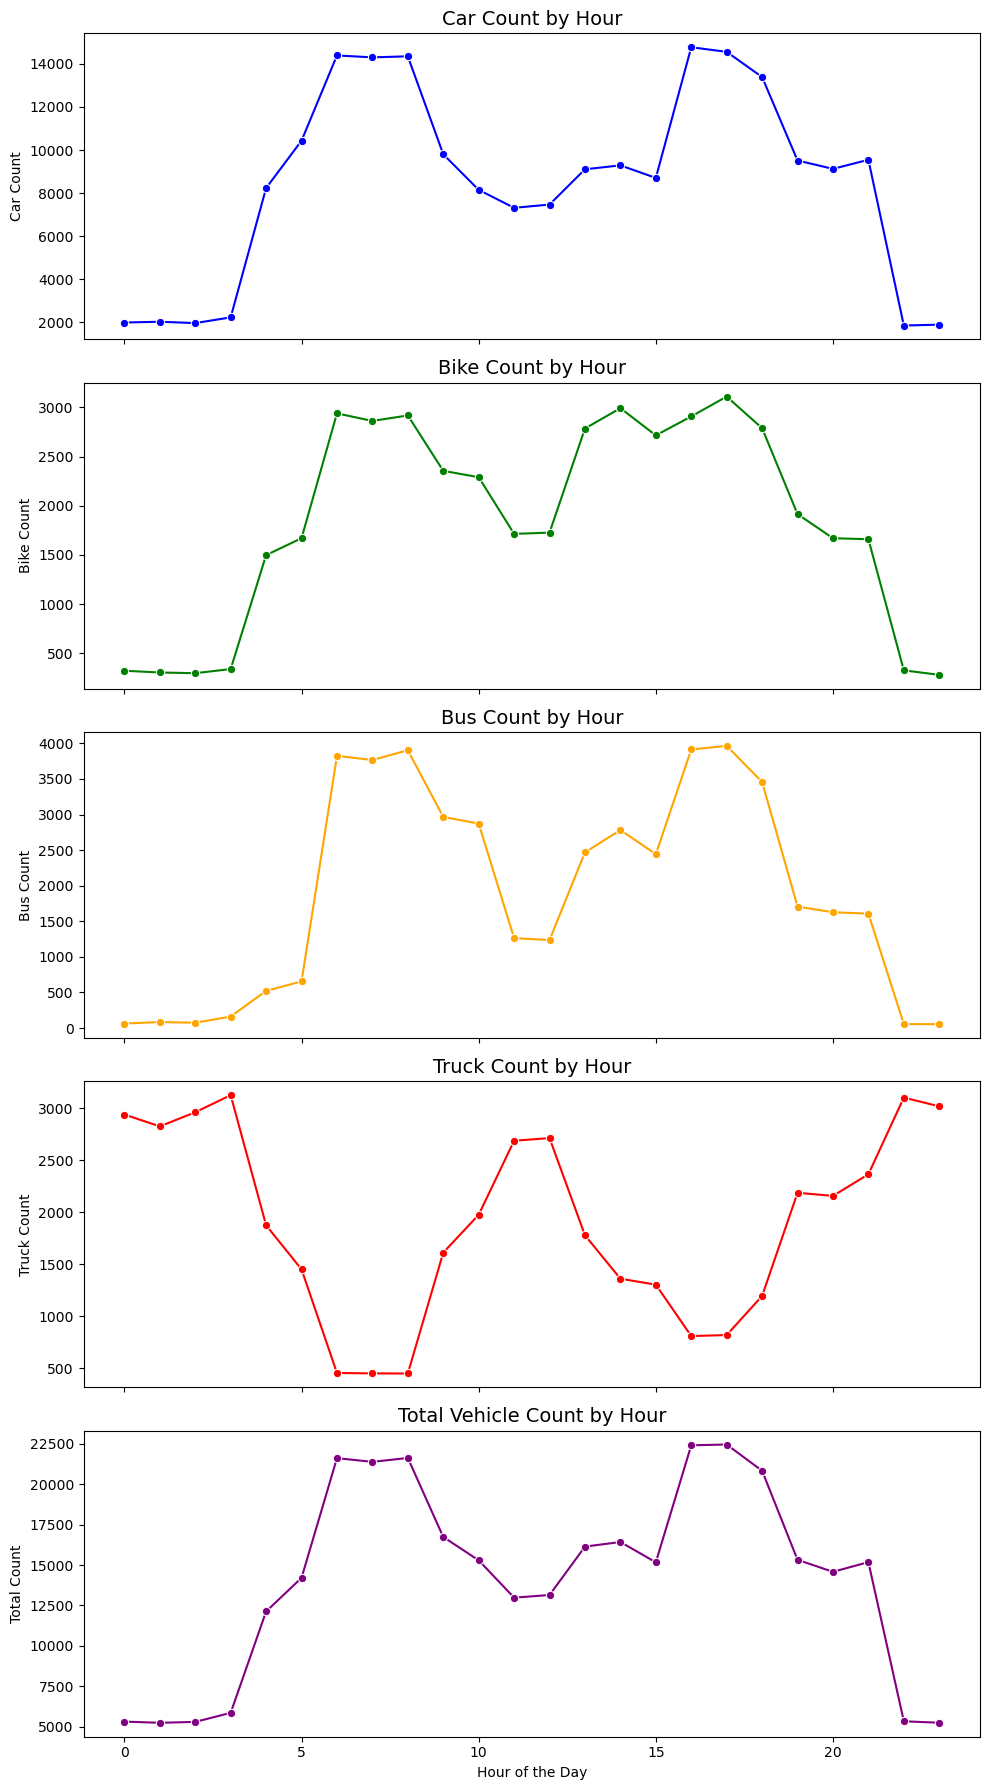

In [25]:
df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour

# Select only numeric columns for summation
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
# Group by hour and sum the vehicle counts
hourly_data = df.groupby('Hour')[numeric_columns].sum()

# Set the figure size and layout for separate plots
fig, axes = plt.subplots(5, 1, figsize=(10, 18), sharex=True)

# Plot for CarCount
sns.lineplot(x=hourly_data.index, y=hourly_data['CarCount'], ax=axes[0], color='blue', marker='o')
axes[0].set_title('Car Count by Hour', fontsize=14)
axes[0].set_ylabel('Car Count')

# Plot for BikeCount
sns.lineplot(x=hourly_data.index, y=hourly_data['BikeCount'], ax=axes[1], color='green', marker='o')
axes[1].set_title('Bike Count by Hour', fontsize=14)
axes[1].set_ylabel('Bike Count')

# Plot for BusCount
sns.lineplot(x=hourly_data.index, y=hourly_data['BusCount'], ax=axes[2], color='orange', marker='o')
axes[2].set_title('Bus Count by Hour', fontsize=14)
axes[2].set_ylabel('Bus Count')

# Plot for TruckCount
sns.lineplot(x=hourly_data.index, y=hourly_data['TruckCount'], ax=axes[3], color='red', marker='o')
axes[3].set_title('Truck Count by Hour', fontsize=14)
axes[3].set_ylabel('Truck Count')

# Plot for Total
sns.lineplot(x=hourly_data.index, y=hourly_data['Total'], ax=axes[4], color='purple', marker='o')
axes[4].set_title('Total Vehicle Count by Hour', fontsize=14)
axes[4].set_xlabel('Hour of the Day')
axes[4].set_ylabel('Total Count')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

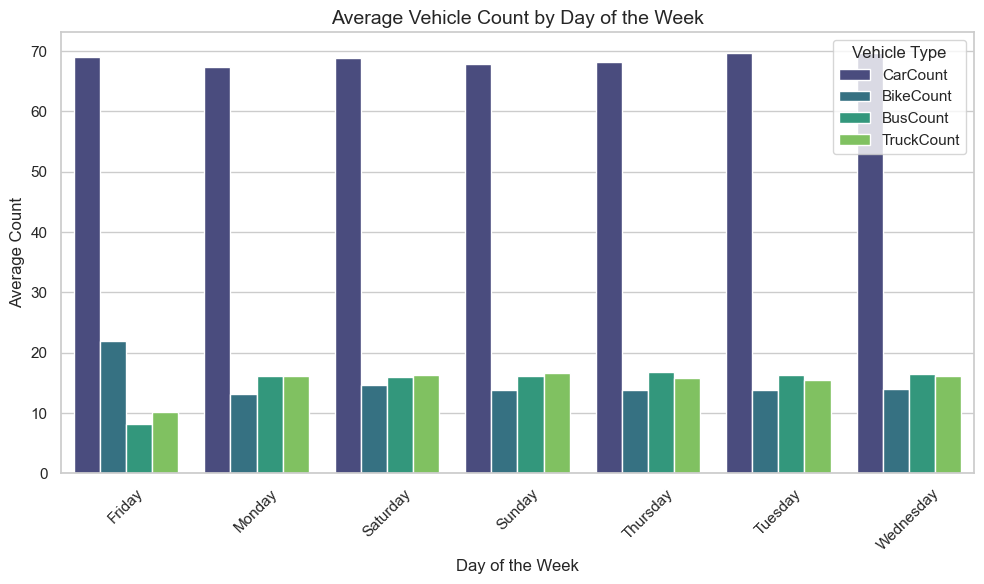

In [27]:
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

# Group by 'Day of the week' and calculate the mean for only the selected numeric columns
grouped_df = df.groupby('Day of the week')[numeric_columns].mean()

# Reset the index to make 'Day of the week' a column again
grouped_df = grouped_df.reset_index()

# Use the melt function to reshape the DataFrame for seaborn
grouped_df_melted = pd.melt(grouped_df, id_vars='Day of the week', var_name='Vehicle Type', value_name='Count')

# Set plot style and size
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the barplot
sns.barplot(x='Day of the week', y='Count', hue='Vehicle Type', data=grouped_df_melted, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Average Vehicle Count by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

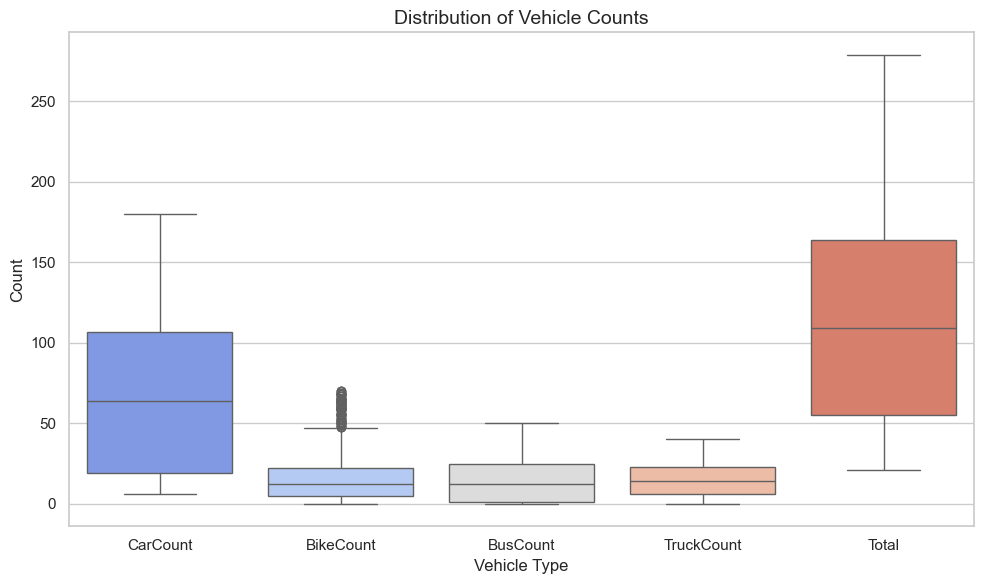

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']], palette='coolwarm')

plt.title('Distribution of Vehicle Counts', fontsize=14)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


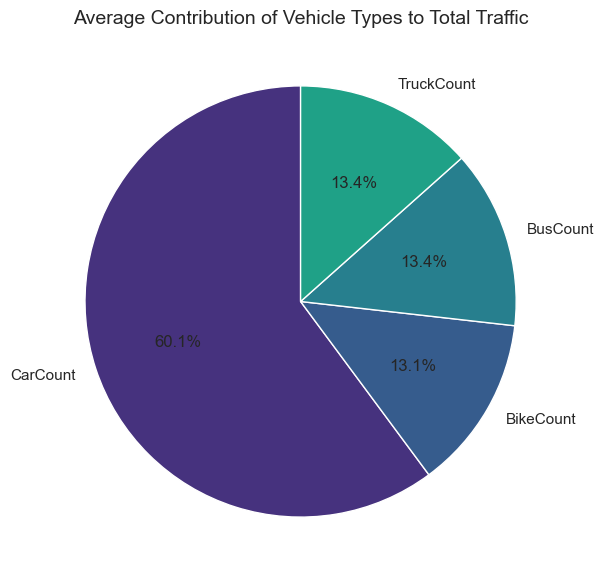

In [31]:
average_vehicle_counts = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()

plt.figure(figsize=(7, 7))
plt.pie(average_vehicle_counts, labels=average_vehicle_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Average Contribution of Vehicle Types to Total Traffic', fontsize=14)
plt.show()


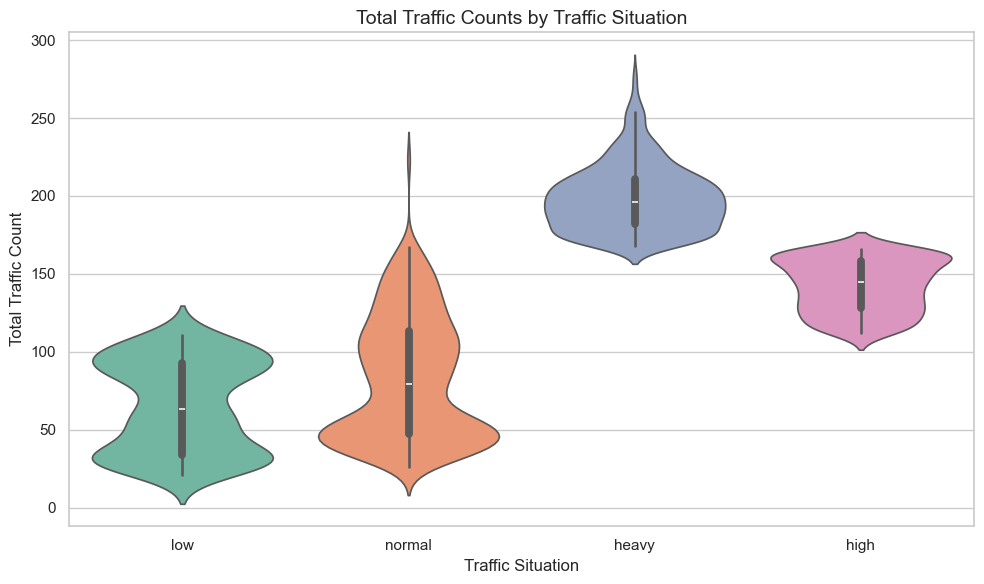

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Traffic Situation', y='Total', data=df, palette='Set2')

plt.title('Total Traffic Counts by Traffic Situation', fontsize=14)
plt.xlabel('Traffic Situation', fontsize=12)
plt.ylabel('Total Traffic Count', fontsize=12)

plt.tight_layout()
plt.show()


In [35]:
df.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,0
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,0
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,0
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,0
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,1


In [37]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time  # Only time is parsed

# Feature Engineering: Create features like hour, minute, and day of the week
df['hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour  # Extract hour from time
df['minute'] = pd.to_datetime(df['Time'].astype(str)).dt.minute  # Extract minute from time
df['day_of_week'] = df['Day of the week']  # We already have the day of the week
df['day_of_month'] = df['Date']  # Use the 'Date' column for the day of the month

# Optional: Add time period (Morning, Afternoon, Evening, Night)
def get_time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_period'] = df['hour'].apply(get_time_period)

# Display the DataFrame with feature-engineered columns
print(df[['Time', 'hour', 'minute', 'day_of_week', 'day_of_month', 'time_period']])

          Time  hour  minute day_of_week  day_of_month time_period
0     00:00:00     0       0     Tuesday            10       Night
1     00:15:00     0      15     Tuesday            10       Night
2     00:30:00     0      30     Tuesday            10       Night
3     00:45:00     0      45     Tuesday            10       Night
4     01:00:00     1       0     Tuesday            10       Night
...        ...   ...     ...         ...           ...         ...
2971  22:45:00    22      45    Thursday             9       Night
2972  23:00:00    23       0    Thursday             9       Night
2973  23:15:00    23      15    Thursday             9       Night
2974  23:30:00    23      30    Thursday             9       Night
2975  23:45:00    23      45    Thursday             9       Night

[2976 rows x 6 columns]


In [39]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,hour,minute,day_of_week,day_of_month,time_period
0,00:00:00,10,Tuesday,31,0,4,4,39,low,0,0,0,Tuesday,10,Night
1,00:15:00,10,Tuesday,49,0,3,3,55,low,0,0,15,Tuesday,10,Night
2,00:30:00,10,Tuesday,46,0,3,6,55,low,0,0,30,Tuesday,10,Night
3,00:45:00,10,Tuesday,51,0,2,5,58,low,0,0,45,Tuesday,10,Night
4,01:00:00,10,Tuesday,57,6,15,16,94,normal,1,1,0,Tuesday,10,Night


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables (if any) like 'day_of_week' and 'time_period'
label_encoder = LabelEncoder()
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])
df['time_period'] = label_encoder.fit_transform(df['time_period'])

# Separate features (X) and target (y)
X = df[['hour', 'minute', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'day_of_week', 'day_of_month', 'time_period']]
y = df['Traffic Situation']  # target column we want to predict

# Convert the target variable to numerical format
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# Evaluate the training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.95


In [47]:
from sklearn.metrics import classification_report

# Detailed classification report
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

       heavy       0.90      0.97      0.94       127
        high       0.89      0.81      0.85        63
         low       0.98      0.97      0.98        66
      normal       0.97      0.96      0.97       340

    accuracy                           0.95       596
   macro avg       0.94      0.93      0.93       596
weighted avg       0.95      0.95      0.95       596



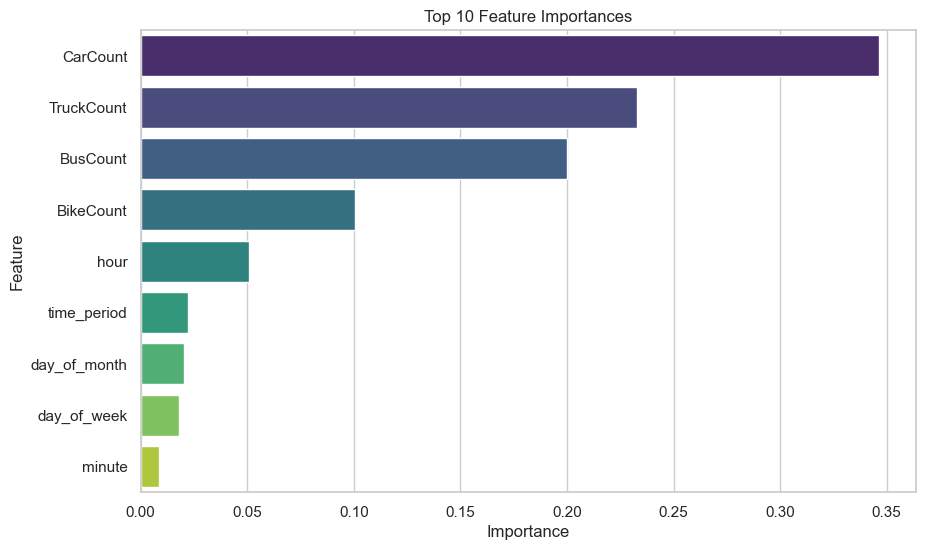

In [49]:
importances = model.feature_importances_
feature_names = X_train.columns  # assuming your input features are in a DataFrame

# Create a DataFrame for easier plotting
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Assume df is your DataFrame and has already been prepared

# Encode categorical variables (if any) like 'day_of_week' and 'time_period'
label_encoder = LabelEncoder()
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])
df['time_period'] = label_encoder.fit_transform(df['time_period'])

# Separate features (X) and target (y)
X = df[['hour', 'minute', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'day_of_week', 'day_of_month', 'time_period']]
y = df['Traffic Situation']  # This is the target column we want to predict

# Convert the target variable to numerical format
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model with L2 regularization
model = LogisticRegression(
    penalty='l2',      # Use L2 regularization
    C=1.0,             # Inverse of regularization strength
    solver='lbfgs',    # Optimization algorithm
    max_iter=1000,     # Maximum number of iterations for convergence
    random_state=42
)

In [53]:
model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.89
Test Accuracy: 0.89


In [55]:
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

       heavy       0.86      0.98      0.92       127
        high       0.85      0.62      0.72        63
         low       0.82      0.76      0.79        66
      normal       0.91      0.93      0.92       340

    accuracy                           0.89       596
   macro avg       0.86      0.82      0.83       596
weighted avg       0.88      0.89      0.88       596



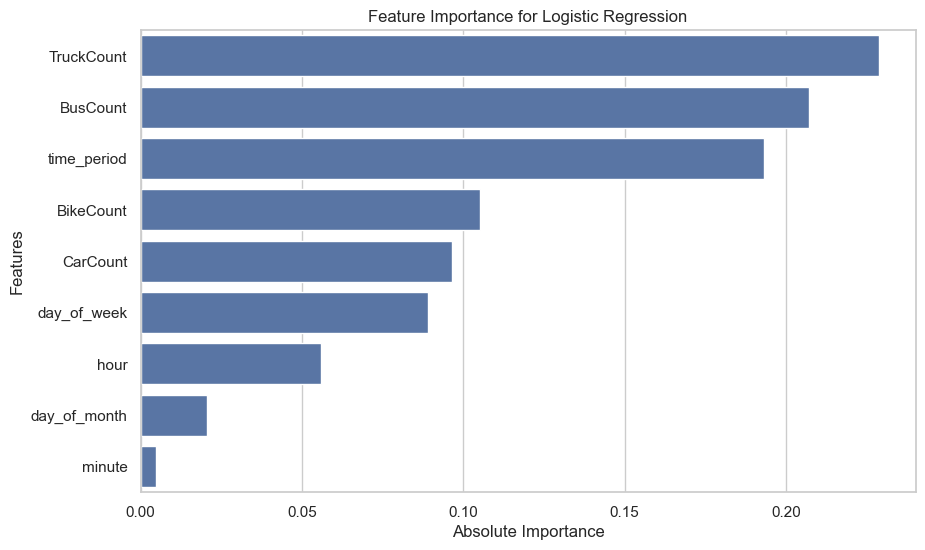

In [57]:
# Feature importance using the absolute values of the coefficients
feature_importance = np.abs(model.coef_[0])
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Absolute Importance')
plt.ylabel('Features')
plt.show()